In [1]:
#imports

import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt

In [2]:
#estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model

In [3]:
#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [4]:
#cross validation
#tuve que sustituir cross validation por model selection
from sklearn.model_selection import train_test_split

In [5]:
#data
rawData = pd.read_csv('C:\CONCATENACION\Clients-1.csv')#, header=1)
rawData.head()
rawData.info()
rawData.describe()
rawData

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [6]:
#variableName = dataframe.iloc[rows,columns]
variableName = rawData.iloc[1,1]
variableName

120000

In [7]:
#variableName = dataframe['coumnName']
variableName = rawData['PAY_AMT6']
variableName

0           0
1        2000
2        5000
3        1000
4         679
         ... 
29995    1000
29996       0
29997    3100
29998    1804
29999    1000
Name: PAY_AMT6, Length: 30000, dtype: int64

In [8]:
#features
features = rawData.iloc[:,12:23]
print('Summary of feature sample')
features.head()

Summary of feature sample


,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5
0,3913,3102,689,0,0,0,0,689,0,0,0
1,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0
2,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000
3,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069
4,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689


In [9]:
#dependent variable
depVar = rawData['PAY_AMT6']

In [10]:
#Training Set (Feature Space: X Training)
X_train = (features[: 1000])
X_train.head()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5
0,3913,3102,689,0,0,0,0,689,0,0,0
1,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0
2,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000
3,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069
4,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689


In [11]:
#Dependent Variable Training Set (y Training)
y_train = depVar[: 1000]
y_train_count = len(y_train.index)
print('The number of observations in the Y training set are:',str(y_train_count))
y_train.head()

The number of observations in the Y training set are: 1000


0       0
1    2000
2    5000
3    1000
4     679
Name: PAY_AMT6, dtype: int64

In [12]:
#Testing Set (X Testing)
X_test = features[-100:]
X_test_count = len(X_test.index)
print('The number of observations in the feature testing set is:',str(X_test_count))
print(X_test.head())

The number of observations in the feature testing set is: 100
       BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  \
29900      16809          0          0          0          0          0   
29901      50845      48750     103486      50590      50248      49387   
29902      10392     168088     168955     161351     126198     124746   
29903      27378      17082      13333         99         99     172104   
29904      54952      56021      54126      58732      59306      59728   

       PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  
29900         0         0         0         0         0  
29901         0      6556      3250      1563      1208  
29902    168096      6409      7335      4448      4519  
29903     10018     13333        99        99    172104  
29904      2600      4553      5800      2000      1000  


In [13]:
#Ground Truth (y_test) 
y_test = depVar[-100:]
y_test_count = len(y_test.index)
print('The number of observations in the Y training set are:',str(y_test_count))
y_test.head()

The number of observations in the Y training set are: 100


29900        0
29901      781
29902     5003
29903    30013
29904     1462
Name: PAY_AMT6, dtype: int64

In [14]:
#CROSS VALIDATION
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)
X_train.shape, X_test.shape

((750, 11), (250, 11))

In [15]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(n_jobs=10)

In [16]:
# BUILDING MODELS

#imports
#numpy,pandas,scipy, math, matplotlib
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt

In [17]:
#estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model

In [18]:
#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [19]:
#cross validation
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import cross_val_score

#Models
modelSVR = SVR()
modelRF = RandomForestRegressor()
modelLR = LinearRegression()

In [20]:
#features
features = rawData.iloc[:,12:23]
print('Summary of feature sample')
features.head()

Summary of feature sample


,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5
0,3913,3102,689,0,0,0,0,689,0,0,0
1,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0
2,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000
3,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069
4,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689


In [21]:
#dependent variable
print(depVar)

model.fit(X_train,y_train)

0           0
1        2000
2        5000
3        1000
4         679
         ... 
29995    1000
29996       0
29997    3100
29998    1804
29999    1000
Name: PAY_AMT6, Length: 30000, dtype: int64


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=10, normalize=False)

In [22]:
#Random Forest
modelRF.fit(X_train,y_train)

#Support Vector Regression
modelSVR.fit(X_train,y_train)

#Linear Regression
modelLR.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
print(cross_val_score(modelRF, X_train, y_train)) 

[-0.15907174 -0.0018645  -1.59279802]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [24]:
model.score(X_train,y_train)


0.4350472697774076

In [25]:
#Random Forest Regression Model Fitting and Scoring
#Model Fitting
modelRF.fit(X_train,y_train)
print(cross_val_score(modelRF, X_train, y_train))
modelRF.score(X_train,y_train)


[-0.15979788  0.00462163 -0.9396768 ]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.8470780574977435

In [26]:
#Support Vector Regression Model Fitting and Scoring

modelSVR.fit(X_train,y_train)
print(cross_val_score(modelSVR, X_train, y_train)) 
modelSVR.score(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto'

[-0.09685454 -0.02740128 -0.08464298]


-0.034288802838832844

In [27]:
#Linear Regression Model Fitting and Scoring

modelLR.fit(X_train,y_train)
print(cross_val_score(modelLR, X_train, y_train)) 
modelLR.score(X_train,y_train)


[-0.13498015  0.23567817 -2.45875011]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.4350472697774076

In [29]:
#Making Predictions
predictions = modelRF.predict(X_test)


In [30]:
#Evaluating the Results
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

In [31]:
rmse = sqrt(mean_squared_error(y_test, predictions))

predRsquared = r2_score(y_test,predictions)

In [32]:
#Make Predictions
predictions = modelRF.predict(X_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.080
RMSE: 37064.325


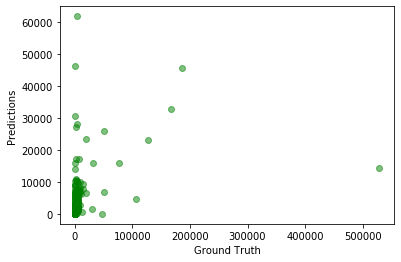

In [33]:
plt.scatter(y_test, 
            predictions,
            color=['green'],
            alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

In [34]:
#Make Predictions
predictions = modelSVR.predict(X_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: -0.026
RMSE: 39144.468


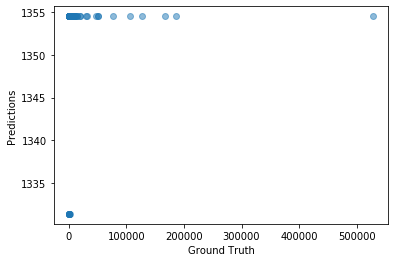

In [35]:
plt.scatter(y_test, 
            predictions, 
            alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

In [36]:
#Make Predictions
predictions = modelLR.predict(X_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.324
RMSE: 31762.767


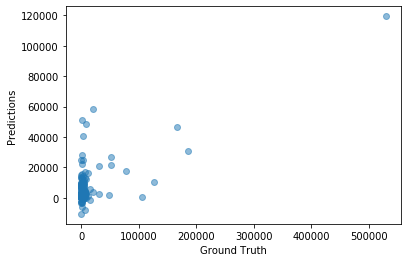

In [37]:
plt.scatter(y_test, 
            predictions, 
            alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

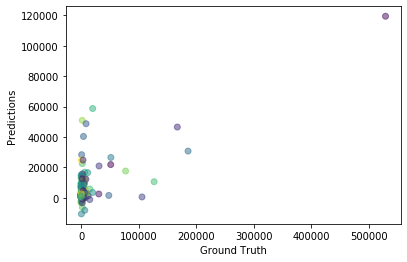

In [44]:
c=np.random.random(len(predictions))
plt.scatter(y_test, 
            predictions, 
            c=c,
            alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

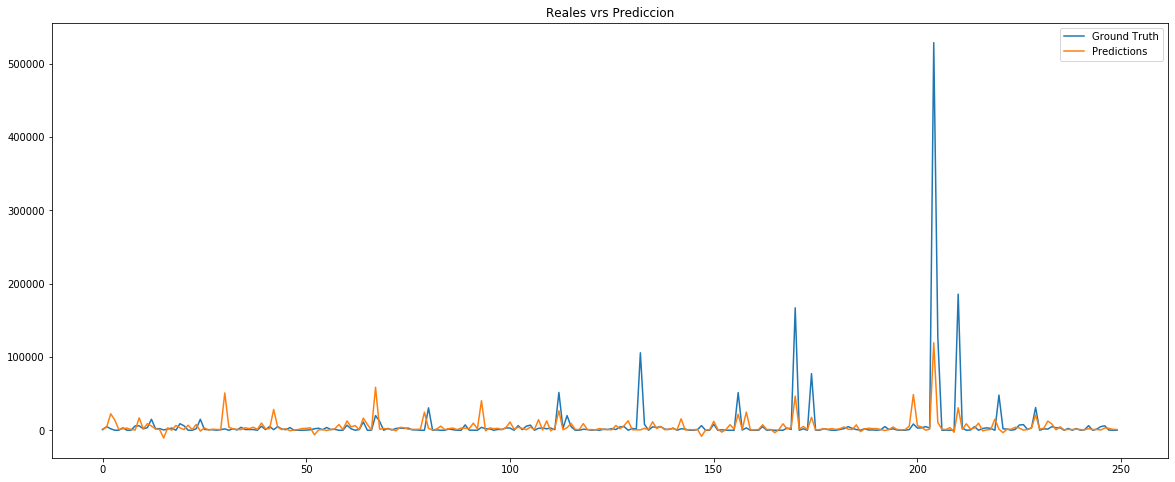

In [51]:
ytestvalues=y_test.values
plt.figure(figsize=(20,8))
plt.title("Reales vrs Prediccion")
plt.plot(ytestvalues,label="Ground Truth")
plt.plot(predictions,label="Predictions")
plt.legend()
plt.show()

In [50]:
ytestvalues

array([   780,   5002,   2011,      0,     60,   3304,      0,     66,
         6000,   6012,   2000,   3520,  15000,   2078,   2244,    396,
         1651,   3000,      0,   8954,   6000,      0,      0,   2090,
        15000,   1114,    826,    700,      0,    800,   1898,      0,
         2000,    390,   4000,   1000,   1000,   1000,      0,   5500,
          904,   5100,    800,   5000,   1623,    768,   3681,      0,
            0,      0,    176,    704,   2000,   2769,    679,   3800,
         1012,   1291,      0,      0,   6915,   2000,      0,   1000,
        11326,      0,      0,  20000,  12111,      0,   2500,    384,
         2418,   2994,   2500,   3000,    520,    458,      0,      0,
        30592,      0,    503,      0,      0,   1751,    744,      0,
            0,   7305,    148,      0,      0,   4000,   2000,   2000,
            0,   1132,   1000,   3202,   3000,      0,   6288,    832,
         5500,   7000,      0,   2709,   3000,   1998,   3000,    862,
      

In [55]:
predictions

array([ 1.55738118e+03,  3.99209366e+03,  2.24711186e+04,  1.39880135e+04,
        9.83346076e+02,  2.06925252e+03,  2.91276588e+03,  1.02137511e+03,
        3.14820941e+02,  1.68105236e+04,  1.74690122e+03,  8.95115324e+03,
        5.81570832e+03,  1.71065265e+03,  1.07112000e+03, -1.06086059e+04,
        3.32903681e+03,  6.38104331e+01,  6.54442529e+03,  3.25103488e+03,
        9.00901209e+02,  6.85950312e+03,  9.25825510e+02,  7.89317171e+03,
       -1.16808697e+03,  3.29145455e+03,  2.37559089e+02,  1.49832509e+03,
        9.80609468e+02,  9.63953112e+02,  5.09017695e+04,  4.25214718e+03,
        1.84590583e+03,  1.22448648e+03,  8.52288350e+02,  3.46386477e+03,
        2.29337946e+03,  4.10783466e+03,  1.25857516e+03,  9.85498760e+03,
        1.93419707e+03,  2.11401815e+03,  2.83372294e+04,  4.00003664e+03,
        9.54923710e+02,  2.08485687e+03, -5.76997418e+02,  2.05129287e+02,
        9.96257395e+02,  2.36285591e+03,  2.62908397e+03,  3.38374693e+03,
       -6.30668522e+03,  

                                  ID  LIMIT_BAL       SEX  EDUCATION  \
ID                          1.000000   0.026179  0.018497   0.039177   
LIMIT_BAL                   0.026179   1.000000  0.024755  -0.219161   
SEX                         0.018497   0.024755  1.000000   0.014232   
EDUCATION                   0.039177  -0.219161  0.014232   1.000000   
MARRIAGE                   -0.029079  -0.108139 -0.031389  -0.143464   
AGE                         0.018678   0.144713 -0.090874   0.175061   
PAY_0                      -0.030575  -0.271214 -0.057643   0.105364   
PAY_2                      -0.011215  -0.296382 -0.070771   0.121566   
PAY_3                      -0.018494  -0.286123 -0.066096   0.114025   
PAY_4                      -0.002735  -0.267460 -0.060173   0.108793   
PAY_5                      -0.022199  -0.249411 -0.055064   0.097520   
PAY_6                      -0.020270  -0.235195 -0.044008   0.082316   
BILL_AMT1                   0.019389   0.285430 -0.033642   0.02

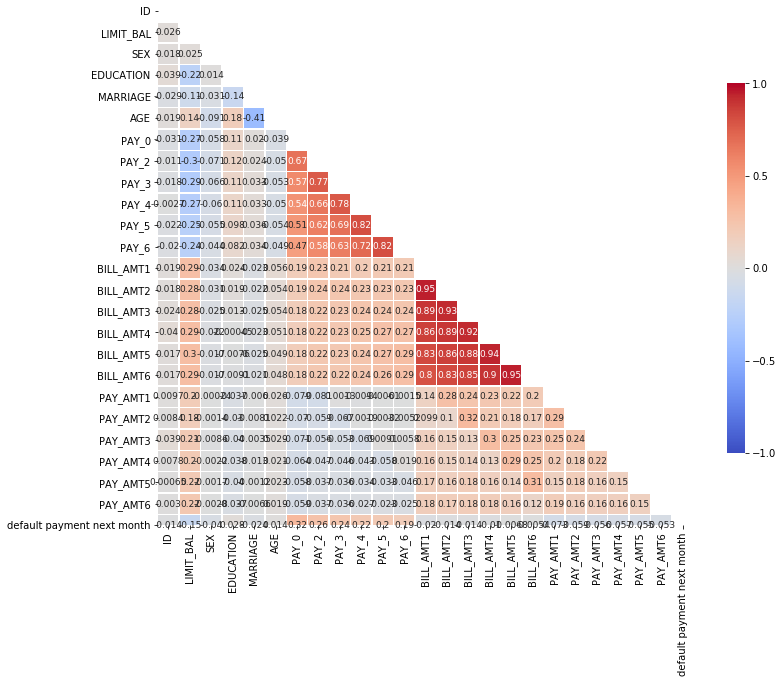

In [38]:
corrMat = rawData.corr()
print(corrMat)
corrMat.style.background_gradient(cmap='coolwarm')
import numpy as np
import pandas as pd
#import pystan
import seaborn as sns

#Correlation Map
np.zeros_like(corrMat)
mask = np.zeros_like(corrMat, dtype=np.bool)
np.triu_indices_from(mask) #Return the indices for the upper-triangle of array
mask[np.triu_indices_from(mask)]= True
f, ax = plt.subplots(figsize=(12, 17))
heatmap = sns.heatmap(corrMat,
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap ='coolwarm',
                      cbar_kws={"shrink": .4, 'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1,
                      vmax = 1,
                      annot = True,
                      annot_kws = {"size": 9})


           BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  \
BILL_AMT1   1.000000   0.951484   0.892279   0.860272   0.829779   0.802650   
BILL_AMT2   0.951484   1.000000   0.928326   0.892482   0.859778   0.831594   
BILL_AMT3   0.892279   0.928326   1.000000   0.923969   0.883910   0.853320   
BILL_AMT4   0.860272   0.892482   0.923969   1.000000   0.940134   0.900941   
BILL_AMT5   0.829779   0.859778   0.883910   0.940134   1.000000   0.946197   
BILL_AMT6   0.802650   0.831594   0.853320   0.900941   0.946197   1.000000   
PAY_AMT1    0.140277   0.280365   0.244335   0.233012   0.217031   0.199965   
PAY_AMT2    0.099355   0.100851   0.316936   0.207564   0.181246   0.172663   
PAY_AMT3    0.156887   0.150718   0.130011   0.300023   0.252305   0.233770   
PAY_AMT4    0.158303   0.147398   0.143405   0.130191   0.293118   0.250237   
PAY_AMT5    0.167026   0.157957   0.179712   0.160433   0.141574   0.307729   

           PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  

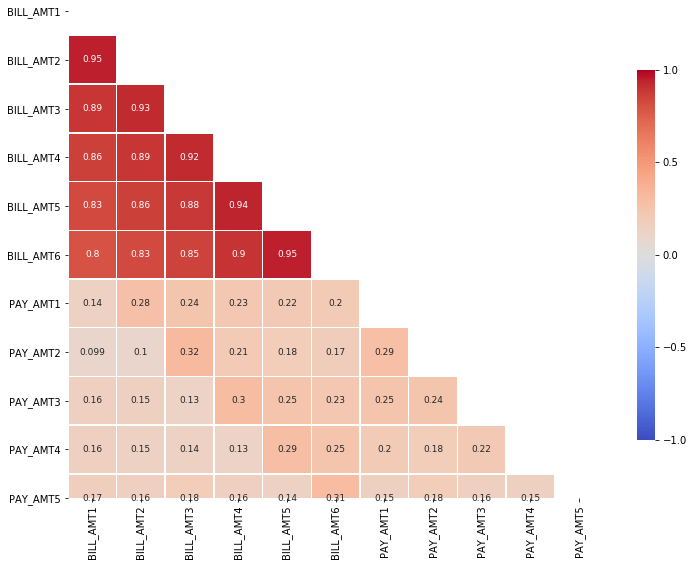

In [39]:
corrMat = features.corr()
print(corrMat)
corrMat.style.background_gradient(cmap='coolwarm')
import numpy as np
import pandas as pd
#import pystan
import seaborn as sns

#Correlation Map
np.zeros_like(corrMat)
mask = np.zeros_like(corrMat, dtype=np.bool)
np.triu_indices_from(mask) #Return the indices for the upper-triangle of array
mask[np.triu_indices_from(mask)]= True
f, ax = plt.subplots(figsize=(12, 17))
heatmap = sns.heatmap(corrMat,
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap ='coolwarm',
                      cbar_kws={"shrink": .4, 'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1,
                      vmax = 1,
                      annot = True,
                      annot_kws = {"size": 9})


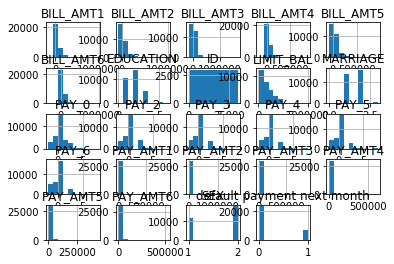

In [57]:
rawData.drop(['AGE'],1).hist()
plt.show()